# Linear Regression Project by Brandon Lee Johnson

### This regression project shows step by steps process for analyzing the research question: should the company concentrate their efforts on imporving their mobile app or website?

**Note: If a categorical variable column exist, dummy variables need to be created.  A dummy variable is a Nominal variable that can take on either 0 or 1. In your regression model, if you have k categories you would include only k-1 dummy variables in your regression/classifier because any one dummy variable is perfectly multicollinear/collinear with remaining set of dummies.**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## About the Data

The data has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
df.style.background_gradient(cmap='Greens',subset='Yearly Amount Spent')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611 Jeffreychester, MN 67218-7250",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692 Josephbury, WV 92213-0247",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980 DPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key West Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255 APO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

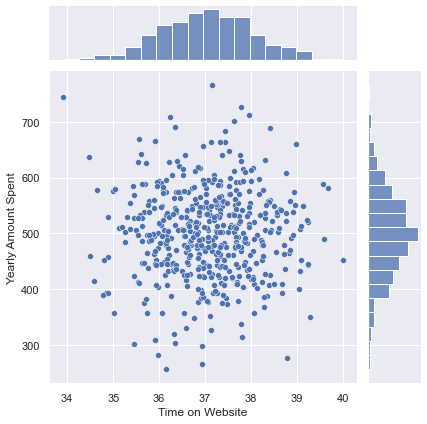

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=df)

#### No correlation between time spent on website by the customers verses yearly amount spent

In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

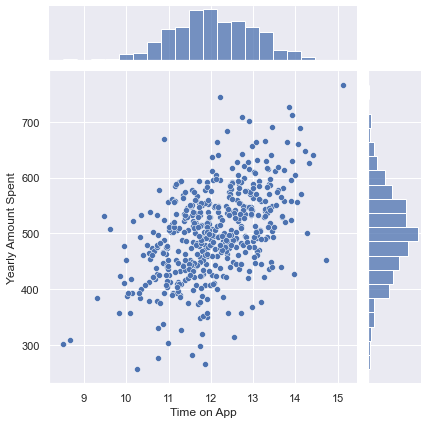

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

#### There is slight correlation between time spent on mobile app and yearly amount spent

In [10]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

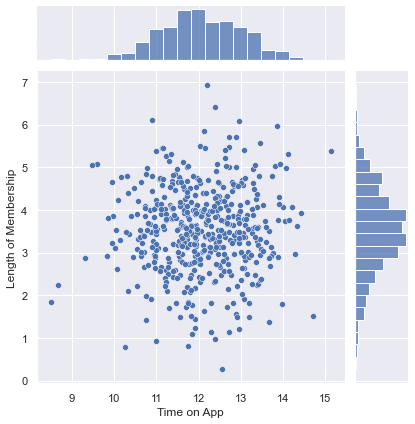

In [11]:
sns.jointplot(x='Time on App', y='Length of Membership', data=df)

#### No relationship between customer membership and time spent on mobile app

## Total data analysis

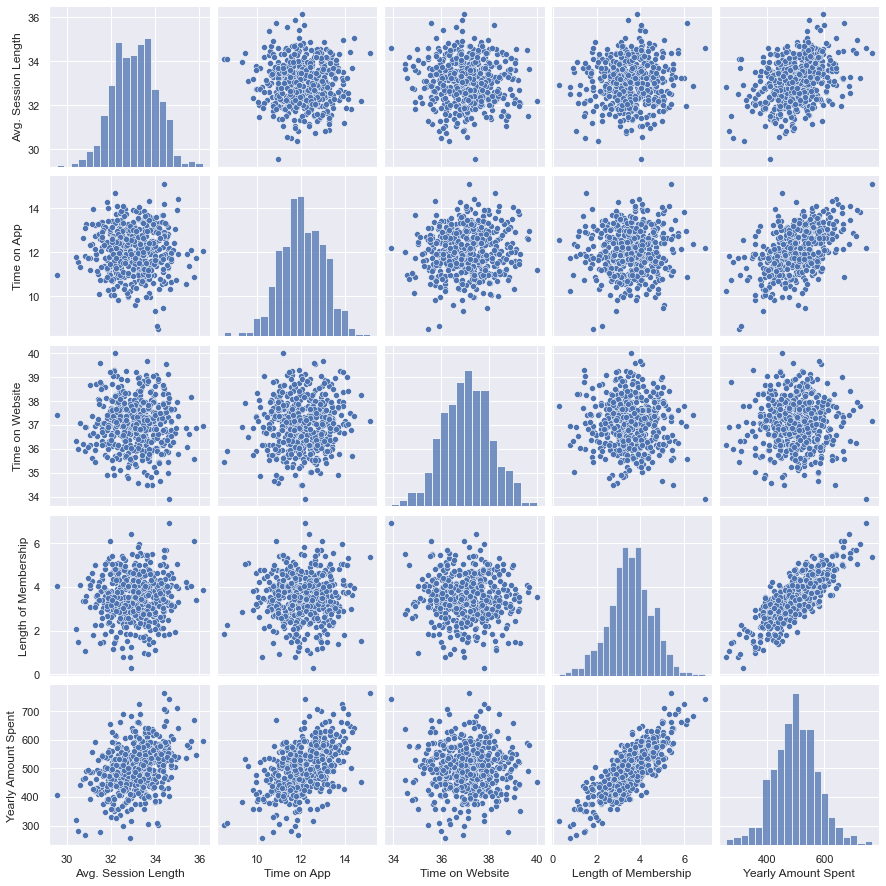

In [12]:
sns.pairplot(df)

<AxesSubplot:>

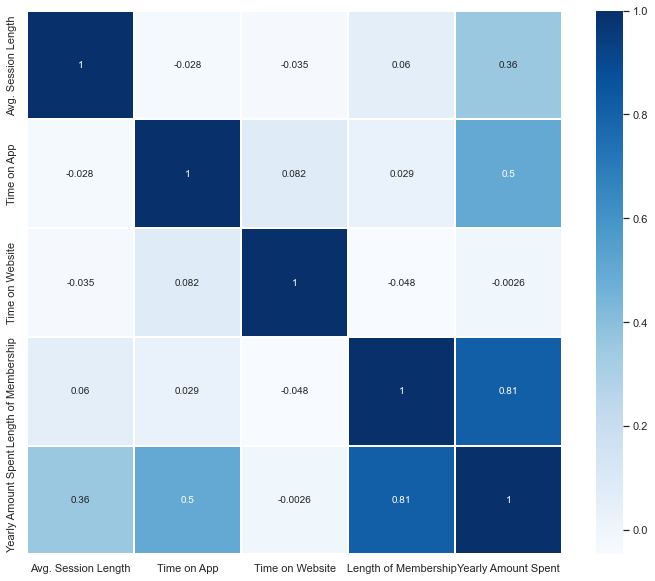

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linecolor='white', linewidths=0.01)

#### Based off the plots, Length of Membership looks to be the most correlated at 81% with Yearly Amount Spent.  Time on App comes in a second at 50%.

In [14]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

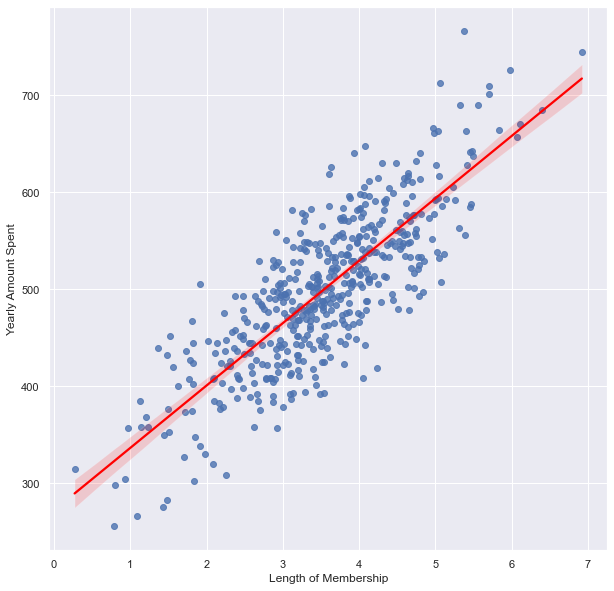

In [15]:
plt.figure(figsize=(10,10))
sns.regplot(x='Length of Membership', y='Yearly Amount Spent', data=df, line_kws={'color':'red'})

#### Linear Relationship between Leng of Membership and Yearly Amount Spent

## Training and Testing Data

** variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

** Model training split. model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

** Import LinearRegression from sklearn.linear_model **

In [20]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [21]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [23]:
cor = lm.coef_

In [24]:
print('{}\n'.format(X.columns), cor)

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

** Use lm.predict() to predict off the X_test set of the data.**

In [25]:
pred = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

<AxesSubplot:xlabel='y Test Data', ylabel='y Predictions'>

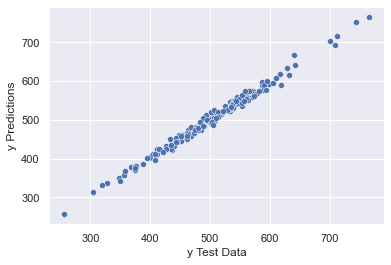

In [26]:
plt.xlabel('y Test Data')
plt.ylabel('y Predictions')
sns.scatterplot(x=y_test,y=pred)

## Evaluating the Model

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.228148653430811
MSE: 79.81305165097385
RMSE: 8.9338150669786


### Highly accurate model

## Residuals

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn histplot, or just plt.hist().**

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

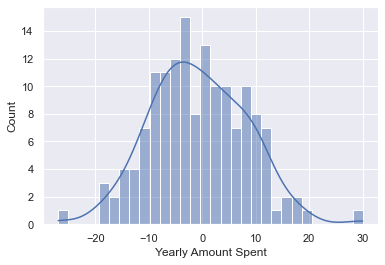

In [28]:
sns.histplot(x=(y_test-pred), bins=30, kde=True)

## Conclusion
Do we focus our efforst on mobile app or website development?

** Recreate the dataframe below. **

In [29]:
cordf = pd.DataFrame(cor, X.columns)
cordf.columns = ['Coeffecient']
cordf.style.background_gradient(cmap='Greens')

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Do you think the company should focus more on their mobile app or on their website?

# The company should focus on the mobile app since its coeffecient is higher than the website's coeffecient.  However, if the website is poorly developed, then that could explain why the mobile app is having a greater impact on yearly money spent by customers.  A poorly developed website could explain  consumer preference for using the mobile app.  Could an improvements in the website contribute to more total money spent by customers?  This would need to be tested to be sure.  Should the business restrict the avenues for customers purchase their goods?  A poorly developed website might be hurting the avenues a customer uses to make purchases.